<a href="https://colab.research.google.com/github/simsekergun/Qc_study/blob/main/Interpolation_Qc_with_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install gputil
!pip install psutil
!pip install humanize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!git clone https://github.com/simsekergun/Qc_datasets_functions.git
%run ./Qc_datasets_functions/Attention.py

fatal: destination path 'Qc_datasets_functions' already exists and is not an empty directory.


In [13]:
Qc_Dataset = torch.load('./Qc_datasets_functions/Qc.pt')
Qc_Dataset.shape

torch.Size([5750, 605])

In [14]:
ntest = 1000 # no of samples in test dataset
f_training = 400 # no of training features
f_testing_start = 440 # where the testing features start

num_neurons = 512
activ = 'ReLU'

eta = 0.001
gamma=0.3
ldr = 10

In [15]:
class FC_Dataset_partial(Dataset):
    def __init__(self, dataset, n1=300, n2 = 440):
        self.dataset = dataset
        self.n1 = n1
        self.n2 = n2

    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self, idx):
        x = self.dataset[:, :self.n1]
        y = self.dataset[:, self.n2:]
        x = x.__getitem__(idx)
        y = y.__getitem__(idx)
        return x, y

In [16]:
train_data, test_data = torch.utils.data.random_split(FC_Dataset_partial(dataset=Qc_Dataset,n1=f_training, n2 = f_testing_start), (Qc_Dataset.shape[0]-1000, 1000)) 

In [17]:
# Loading the data through DataLoader:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [18]:
# Defining a neural network:
num_features = train_data[0][0].shape[0]
num_targets = train_data[0][1].shape[0]

# del fc_model_1
fc_model_1 = nn.Sequential(
    getLayer(num_features, num_neurons, activation=activ),
    getLayer(num_neurons, num_neurons, activation=activ),
    getLayer(num_neurons, 2*num_neurons, activation=activ),
    getLayer(2*num_neurons, 2*num_neurons, activation=activ),
    getLayer(2*num_neurons, 4*num_neurons, activation=activ),
    getLayer(4*num_neurons, 4*num_neurons, activation=activ),
    nn.Linear(4*num_neurons, num_targets),
)

loss_func = nn.MSELoss()
optimizer = torch.optim.AdamW(fc_model_1.parameters(), lr=eta)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, ldr, gamma=gamma)

In [19]:
num_features, num_targets

(400, 165)

In [20]:
# training the fully connected model
start = time.time()
fc_1_results = train_network_reg(fc_model_1, loss_func, train_loader, test_loader=test_loader, epochs=100, score_funcs={'R^2 score': r2_score}, 
                                device=device, optimizer=optimizer, lr_schedule=scheduler)
stop = time.time()

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/149 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

In [21]:
print('Processing time: %s sec' %(stop-start))

Processing time: 173.01209425926208 sec


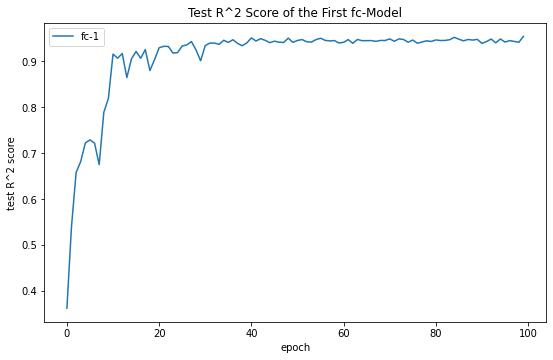

In [22]:
# Plotting the accuracy of the fully connected model:
sns.lineplot(x='epoch', y='test R^2 score', data=fc_1_results, label='fc-1')
plt.title('Test R^2 Score of the First fc-Model')
plt.gcf().set_size_inches(9, 5.5)
plt.show()

In [23]:
fc_1_results

,epoch,total time,train loss,test loss,train R^2 score,test R^2 score
0,0,1.616775,2.448145,0.878458,-0.759632,0.362589
1,1,3.694299,0.898289,0.639353,0.357284,0.540821
2,2,5.098809,0.876113,0.476328,0.371977,0.658047
3,3,6.479606,0.761408,0.438199,0.454234,0.682210
4,4,7.877381,0.526971,0.391549,0.622146,0.722307
...,...,...,...,...,...,...
95,95,137.935070,0.088553,0.080872,0.936563,0.941926
96,96,139.337897,0.093698,0.076491,0.933267,0.945130
97,97,140.762808,0.090791,0.078718,0.934830,0.943359
98,98,142.192901,0.093124,0.081578,0.933129,0.941487
